<a href="https://colab.research.google.com/github/effection00/codestates/blob/main/n133a%20%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [48]:
# 이곳에 답안을 작성하시기 바랍니다
import numpy as np
mat = np.array([[4,2],[2,4]])

value = np.linalg.eig(mat)[0]
vector = np.linalg.eig(mat)[1]
value, vector

(array([6., 2.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [50]:
# 이곳에 답안을 작성하시기 바랍니다
import seaborn as sns
peng = sns.load_dataset("penguins")
peng = peng[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
peng = peng.dropna()
peng

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [51]:
from sklearn.preprocessing import StandardScaler  
import pandas as pd

x = peng.drop(['species'], axis=1).values 
y = peng['species'].values 

#표준화
x = StandardScaler().fit_transform(x) 
pca_df = pd.DataFrame(x, columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [52]:
from sklearn.decomposition import PCA

#주성분 2개 설정
pca = PCA(n_components=2) 
pengComponents = pca.fit_transform(x)
pengDf = pd.DataFrame(data=pengComponents, columns = ['PC1', 'PC2'])
pengDf.index = peng.species
pengDf

,PC1,PC2
species,,
Adelie,-1.843445,0.047702
Adelie,-1.306762,-0.428348
Adelie,-1.369181,-0.154476
Adelie,-1.878827,-0.002048
Adelie,-1.911748,0.829210
...,...,...
Gentoo,2.006436,-0.958909
Gentoo,1.840886,-0.767714
Gentoo,2.760742,0.288886


In [53]:
ratio = pca.explained_variance_ratio_
ratio

array([0.68843878, 0.19312919])

In [54]:
sum(pca.explained_variance_ratio_)

0.8815679694372629

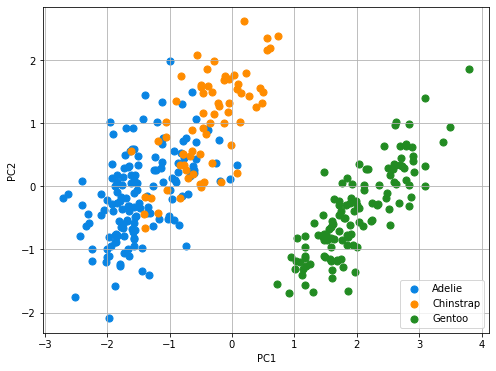

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)


targets = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['#0984e3', 'darkorange', 'forestgreen']
for target, color in zip(targets,colors):
    indicesToKeep = pengDf.index == target
    ax.scatter(pengDf.loc[indicesToKeep, 'PC1']
               , pengDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets, loc = 4)
ax.grid()

In [56]:
np.arange(5)+1

array([1, 2, 3, 4, 5])

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [57]:
pca = PCA(n_components=4) 
pengComponents = pca.fit_transform(x)
pengDf2 = pd.DataFrame(data=pengComponents, columns = ['PC1', 'PC2','PC3','PC4'])
pengDf2.index = peng.species
pca.fit(pengDf2)
ratio2 = pca.explained_variance_ratio_
ratio2

array([0.68843878, 0.19312919, 0.09130898, 0.02712305])

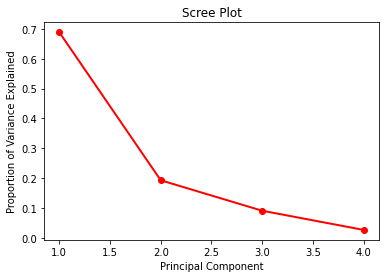

array([0.68843878, 0.19312919, 0.09130898, 0.02712305])

In [58]:
# 이곳에 답안을 작성하시기 바랍니다
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PCA_values = np.arange(pca.n_components) +1
plt.plot(PCA_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
pca.explained_variance_ratio_
#주성분을 3개까지 선택했을때 97.2%로 90%가 넘으므로 3개의 PC를 사용해야 한다